# Plot temperature response over time

This notebook does the same as [2_compute_delta_T.ipynb](2_compute_delta_T.ipynb) except that it varies the ECS parameter and outputs a table of changes in temperature with respect to some reference year (defined below).  

In [24]:
from ar6_ch6_rcmipfigs.constants import BASE_DIR
from ar6_ch6_rcmipfigs.constants import OUTPUT_DATA_DIR, INPUT_DATA_DIR, RESULTS_DIR

PATH_DATASET = OUTPUT_DATA_DIR / 'ERF_data.nc'
PATH_DT_OUTPUT = RESULTS_DIR / 'tables'/'table_sens_dT_cs.csv'

**Output table found in:**

In [25]:
print(PATH_DT_OUTPUT)

/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/results/tables/table_sens_dT_cs.csv


### General about computing $\Delta T$: 

We compute the change in GSAT temperature ($\Delta T$) from the effective radiative forcing (ERF) estimated from [Smith 2020](https://zenodo.org/record/3973015), by integrating with the impulse response function (IRF(t-t'))
#todo: check for ref for IRF
(Geoffroy at al 2013).

For any forcing agent $x$, with estimated ERF$_x$, the change in temperature $\Delta T$ is calculated as:


\begin{align*} 
\Delta T_x (t) &= \int_0^t ERF_x(t') IRF(t-t') dt' \\
\end{align*}

#### The Impulse response function (IRF):
In these calculations we use:
\begin{align*}
IRF(t) = \frac{q_1}{d_1} \exp\Big(\frac{-t}{d_1}\Big) + \frac{q_2}{d_2} \exp\Big(\frac{-t}{d_2}\Big)
\end{align*}

Where the constants, $q_i$ and $d_i$ are from XXXXXX????

## Input data:
See [README.md](../../README.md)

# Code + figures

In [26]:
import pandas as pd
import xarray as xr
fn_IRF_constants = INPUT_DATA_DIR/'irf_from_2xCO2_2020_12_02_050025-1.csv'
irf_consts = pd.read_csv(fn_IRF_constants).set_index('id')

ld1 = 'd1 (yr)'
ld2 = 'd2 (yr)'
lq1 = 'q1 (K / (W / m^2))'
lq2 = 'q2 (K / (W / m^2))'
median = 'median'
perc5 = '5th percentile'
perc95 = '95th percentile'
irf_consts#[d1]

,C (W yr / m^2 / K),C_d (W yr / m^2 / K),alpha (W / m^2 / K),eta (dimensionless),kappa (W / m^2 / K),d1 (yr),d2 (yr),q1 (K / (W / m^2)),q2 (K / (W / m^2)),efficacy (dimensionless),ecs (K),tcr (K),rf2xCO2 (W / m^2)
id,,,,,,,,,,,,,
median,18.882199,74.696905,1.326450,1.842415,0.245947,10.514430,411.184413,0.551673,0.202220,1.842415,2.956595,1.902808,3.921774
5th percentile,13.863160,71.008211,1.661241,1.621780,0.362412,6.112719,267.486167,0.437167,0.164793,1.621780,2.037291,1.417367,3.384431
95th percentile,20.094672,127.347922,0.983305,1.498099,0.362468,12.988083,552.802552,0.637427,0.379552,1.498099,4.519303,2.411874,4.443852
ensemble member 0,14.376108,181.972962,1.140837,0.623533,0.614109,9.357974,399.022327,0.645521,0.231028,0.623533,3.622535,2.390378,4.132722
ensemble member 2,9.213528,145.859092,1.552934,1.134904,0.587564,4.129695,356.642686,0.445928,0.198014,1.134904,2.134403,1.451264,3.314588
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ensemble member 596,19.096039,120.353129,1.211832,0.940455,0.412653,11.814680,389.001769,0.612230,0.212967,0.940455,3.256443,2.080608,3.946262
ensemble member 594,9.550309,61.534455,2.145485,2.176843,0.282746,3.446667,281.070348,0.359590,0.106505,2.176843,2.046529,1.554830,4.390797
ensemble member 595,10.014547,81.151740,0.676789,2.504343,0.204552,8.345005,703.468878,0.825554,0.652012,2.504343,5.191214,2.665050,3.513355


In [27]:
from ar6_ch6_rcmipfigs.constants import OUTPUT_DATA_DIR, INPUT_DATA_DIR, RESULTS_DIR
PATH_DATASET = OUTPUT_DATA_DIR / 'ERF_data.nc'
 
PATH_DT_TAB_OUTPUT = RESULTS_DIR / 'tables'/'table_sens_dT_cs.csv'
PATH_DT_OUTPUT = OUTPUT_DATA_DIR / 'dT_data_RCMIP.nc'

**Output table found in:**

In [28]:
print(PATH_DT_OUTPUT)

/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/data_out/dT_data_RCMIP.nc


## Imports:

In [29]:
import xarray as xr
from IPython.display import clear_output
import numpy as np
import os
import re
from pathlib import Path
import pandas as pd
import tqdm
from scmdata import df_append, ScmDataFrame
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:

climatemodel = 'climatemodel'
scenario = 'scenario'
variable = 'variable'
time = 'time'
percentile = 'percentile'

## Set values:

ECS parameters:

In [47]:
IRFconstants = [perc5, median, perc95]
#{'ECS = 2K':0.526, 'ECS = 3.4K':0.884, 'ECS = 5K': 1.136 }

Year to integrate from and to:

In [48]:
first_y ='1850'
last_y = '2100'

**Set reference year for temperature change:**

In [49]:
ref_year = '2021'

**Years to output change in**

In [50]:
years= ['2040', '2100']

## IRF:

In [51]:

def IRF(t, d1, q1, d2, q2):
    """
    Returns the IRF function for:
    :param q2:
    :param d2:
    :param q1:
    :param d1:
    :param t: Time in years
    :return:
    IRF
    """
    irf = q1/d1*np.exp(-t/d1) + q2/d2*np.exp(-t/d2)
    return irf
        #l * (alpha1 * np.exp(-t / tau1) + alpha2 * np.exp(-t / tau2))

## ERF:
Read ERF from file

### Define variables to look at:

In [52]:
# variables to plot:
variables_erf_comp = [
    'ch4',
    'aerosol-radiation_interactions',
    'aerosol-cloud_interactions',
    'o3_tropospheric',
    #'F-Gases|HFC',
    'bc_on_snow']
# total ERFs for anthropogenic and total:
variables_erf_tot = ['total_anthropogenic',
                     'total']
variables_all = variables_erf_comp + variables_erf_tot
# Scenarios to plot:
scenarios_fl = ['ssp119', 'ssp126', 'ssp245', 'ssp370', 'ssp370-lowNTCF-aerchemmip',  # 'ssp370-lowNTCF', Due to mistake here
                'ssp585']#, 'historical']

### Open dataset:

In [53]:
ds = xr.open_dataset(PATH_DATASET).sel(year=slice(1700,2200)) # we need only years until 1700
da_ERF = ds['ERF']

#ds['time'] = \
#ds['year'].to_pandas().index.map('{}-01-01'.format)
ds['time'] = pd.to_datetime(ds['year'].to_pandas().index.map(str), format = '%Y')

# delta_t is 1 (year)
ds['delta_t'] = xr.DataArray(np.ones(len(ds['year'])), dims='year', coords={'year': ds['year']})


## Integrate:
The code below integrates the read in ERFs with the pre defined impulse response function (IRF).

\begin{align*} 
\Delta T (t) &= \int_0^t ERF(t') IRF(t-t') dt' \\
\end{align*}

In [54]:
name_deltaT = 'Delta T'


def new_varname(var, nname):
    """
    var:str
        Old variable of format varname|bla|bla
    nname:str
        name for the resulting variable, based on var
    Returns
    -------
    new variable name with nname|bla|bla
    """
    return nname #+ '|' + '|'.join(var.split('|')[1:])


def integrate_(i, var, nvar, ds, ds_DT, irf_consts):
    """
    
    Parameters
    ----------
    i:int
        the index for the integral
    var:str
        the name of the EFR variables to integrate
    nvar:str
        the name of output integrated value

    ds:xr.Dataset
        the ds with the input data
    ds_DT: xr.Dataset
        the output ds with the integrated results
    csfac: climate sensitivity factor (for IRF)
    Returns
    -------
    None
    
    """
    # lets create a ds that goes from 0 to i inclusive
    ds_short = ds[{'year': slice(0, i + 1)}].copy()
    # lets get the current year
    current_year = ds_short['year'][{'year': i}]#.dt.year
    # lets get a list of years
    years = ds_short['year']#.dt.year
    # lets get the year delta until current year(i)
    ds_short['end_year_delta'] = current_year - years

    # lets get the irf values from 0 until i
    d1 = irf_consts[ld1]
    d2 = irf_consts[ld2]
    q1 = irf_consts[lq1]
    q2 = irf_consts[lq2]

    ds_short['irf'] = IRF(
        ds_short['end_year_delta'] * ds_short['delta_t'], d1, q1, d2, q2)

    # lets do the famous integral
    ds_short['to_integrate'] = \
        ds_short[var] * \
        ds_short['irf'] * \
        ds_short['delta_t']

    # lets sum all the values up until i and set
    # this value at ds_DT
    # If whole array is null, set value to nan
    if np.all(ds_short['to_integrate'].isnull()):  # or last_null:
        _val = np.nan
    else:
        # 

        _ds_int = ds_short['to_integrate'].sum(['year'])
        # mask where last value is null (in order to not get intgral 
        _ds_m1 = ds_short['to_integrate'].isel(year=-1)
        # where no forcing data)
        _val = _ds_int.where(_ds_m1.notnull())
    # set value in dataframe:
    ds_DT[nvar][{'year': i}] = _val


def integrate_to_dT(ds, from_t, to_t, variables, irf_consts):
    """
    Integrate forcing to temperature change.

    :param ds: dataset containing the focings
    :param from_t: start year
    :param to_t: end year
    :param variables: variables to integrate
    :param csfac: climate sensitivity factor
    :return:
    """
    # slice dataset
    ds_sl = ds.sel(year=slice(from_t, to_t))
    len_time = len(ds_sl['year'])
    # lets create a result DS
    ds_DT = ds_sl.copy()

    # lets define the vars of the ds
    #vars = variables  # variables_erf_comp+ variables_erf_tot #['EFR']
    for var in variables:
        namevar = name_deltaT
        # set all values to zero for results dataarray:
        ds_DT[namevar] = ds_DT[var] * 0
        # Units Kelvin:
        ds_DT[namevar].attrs['unit'] = 'K'
        if 'unit' in ds_DT[namevar].coords:
            ds_DT[namevar].coords['unit'] = 'K'

    for i in range(len_time):
        # da = ds[var]
        if (i % 20) == 0:
            print('%s of %s done' % (i, len_time))
        for var in variables:
            namevar = new_varname(var, name_deltaT)  # 'Delta T|' + '|'.join(var.split('|')[1:])

            # print(var)
            integrate_(i, var, namevar, ds_sl, ds_DT, irf_consts)
    clear_output()
    fn ='DT_%s-%s.nc' % (from_t, to_t)
    fname = OUTPUT_DATA_DIR/ fn#'DT_%s-%s.nc' % (from_t, to_t)
    # save dataset.
    ds_DT.to_netcdf(fname)
    return ds_DT



## Compute $\Delta T$ with 3 different climate sensitivities

In [55]:
ds

<xarray.Dataset>
Dimensions:   (scenario: 10, variable: 17, year: 451)
Coordinates:
  * year      (year) int64 1750 1751 1752 1753 1754 ... 2196 2197 2198 2199 2200
  * variable  (variable) object 'co2' 'ch4' 'n2o' ... 'total_natural' 'total'
  * scenario  (scenario) object 'ssp534-over' ... 'ssp370-lowNTCF-gidden'
Data variables:
    ERF       (scenario, variable, year) float64 ...
    time      (year) datetime64[ns] 1750-01-01 1751-01-01 ... 2200-01-01
    delta_t   (year) float64 1.0 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0 1.0

In [56]:
irf_consts.loc[median][ld1]

10.514430258366302

In [68]:
dic_ds = {}
for key  in IRFconstants:
    dic_ds[key] = integrate_to_dT(ds, first_y, last_y,('ERF',), irf_consts.loc[key])

## check:

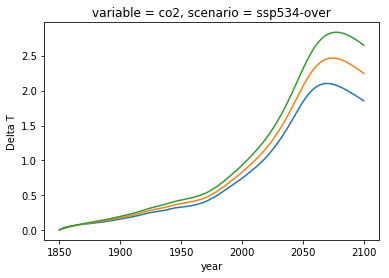

In [69]:
for per in IRFconstants:
    dic_ds[per].isel(scenario=0,variable=0)[name_deltaT].plot()

### Make datset with percentile as dimension:

In [71]:
ds_tmp = xr.Dataset( coords = dic_ds[key].coords)
ds_tmp
for key in IRFconstants:
    ds_tmp[key] = dic_ds[key]['Delta T']#.dims,dic_ds[key],)
ds['Delta T'] = ds_tmp.to_array('percentile')
ds.sel(year=slice(first_y,last_y)).to_netcdf(PATH_DT_OUTPUT)
#ds_DT.to_array('percentile')
#dic_ds[key]['Delta T']

## Table

### Setup table:

In [72]:

iterables = [list(IRFconstants), years]

def setup_table(scenario_n=''):
    _i = pd.MultiIndex.from_product(iterables, names=['', ''])
    table = pd.DataFrame(columns=[var.split('|')[-1] for var in variables_all], index = _i).transpose()
    table.index.name=scenario_n
    return table


In [73]:
# Dicitonary of tables with different ESC:
scntab_dic = {}
for scn in scenarios_fl: 
    # Loop over scenrarios
    tab = setup_table(scenario_n=scn) # make table
    for var in variables_erf_comp:
        # Loop over variables
        tabvar = var.split('|')[-1]
        dtvar = new_varname(var, name_deltaT)
        for key in IRFconstants:
            # Loop over ESC parameters
            for year in years: 
                _tab_da = dic_ds[key][dtvar].sel(scenario=scn, year=slice(year,year))-  dic_ds[key][dtvar].sel(scenario=scn, year=slice(ref_year,ref_year)).squeeze()
                a = float(_tab_da.loc[var].squeeze().values)
                tab.loc[tabvar,(key,year)] = a
    scntab_dic[scn]=tab.copy()


In [74]:
from IPython.display import display

for key in scntab_dic:
    display(scntab_dic[key])

5th percentile               median            \
                                         2040      2100       2040      2100   
ssp119                                                                         
ch4                                -0.0264679 -0.156485 -0.0175815  -0.17738   
aerosol-radiation_interactions      0.0703293  0.113424  0.0825742  0.145811   
aerosol-cloud_interactions           0.215239  0.356489   0.232282  0.439592   
o3_tropospheric                    -0.0486815 -0.124088 -0.0443942 -0.144079   
bc_on_snow                         -0.0229791 -0.034961 -0.0230592 -0.041861   
total_anthropogenic                       NaN       NaN        NaN       NaN   
total                                     NaN       NaN        NaN       NaN   

                               95th percentile             
                                          2040       2100  
ssp119                                                     
ch4                                  -0.011282  -0.188837  
aerosol-radiation_interactions       0.0890795    0.16853  
aerosol-cloud_interactions            0.242076     0.4986  
o3_tropospheric                     -0.0417688  -0.157115  
bc_on_snow                          -0.0231246 -0.0466965  
total_anthropogenic                        NaN        NaN  
total                                      NaN        NaN

5th percentile                 median  \
                                         2040       2100        2040   
ssp126                                                                 
ch4                                -0.0173295  -0.149207 -0.00966057   
aerosol-radiation_interactions      0.0646228   0.117003   0.0753416   
aerosol-cloud_interactions           0.183807   0.355693    0.198799   
o3_tropospheric                    -0.0357429  -0.118015  -0.0319902   
bc_on_snow                         -0.0198594 -0.0333466  -0.0199361   
total_anthropogenic                       NaN        NaN         NaN   
total                                     NaN        NaN         NaN   

                                          95th percentile             
                                     2100            2040       2100  
ssp126                                                                
ch4                             -0.167374     -0.00349102  -0.176163  
aerosol-radiation_interactions   0.150001        0.081087   0.173272  
aerosol-cloud_interactions       0.436245        0.206731   0.492694  
o3_tropospheric                 -0.135532      -0.0291051  -0.146131  
bc_on_snow                     -0.0395193      -0.0198895 -0.0436877  
total_anthropogenic                   NaN             NaN        NaN  
total                                 NaN             NaN        NaN

5th percentile                 median  \
                                         2040       2100        2040   
ssp245                                                                 
ch4                                 0.0321321 -0.0129385   0.0380993   
aerosol-radiation_interactions      0.0239414  0.0898732   0.0325743   
aerosol-cloud_interactions          0.0634366   0.278822   0.0724114   
o3_tropospheric                    0.00907454 -0.0468166   0.0135822   
bc_on_snow                        -0.00701776 -0.0323893 -0.00588569   
total_anthropogenic                       NaN        NaN         NaN   
total                                     NaN        NaN         NaN   

                                          95th percentile             
                                     2100            2040       2100  
ssp245                                                                
ch4                            -0.0079926        0.045482  0.0053523  
aerosol-radiation_interactions   0.115822       0.0360038   0.132166  
aerosol-cloud_interactions       0.336189       0.0735055   0.370716  
o3_tropospheric                -0.0493519       0.0184475 -0.0459419  
bc_on_snow                     -0.0364992     -0.00487856 -0.0389004  
total_anthropogenic                   NaN             NaN        NaN  
total                                 NaN             NaN        NaN

5th percentile                   median  \
                                         2040         2100        2040   
ssp370                                                                   
ch4                                 0.0588998     0.235132   0.0634982   
aerosol-radiation_interactions     0.00380031    0.0200011   0.0105056   
aerosol-cloud_interactions         -0.0171517    0.0255281  -0.0154446   
o3_tropospheric                     0.0370313     0.133339   0.0421015   
bc_on_snow                         0.00632971  0.000534869  0.00856405   
total_anthropogenic                       NaN          NaN         NaN   
total                                     NaN          NaN         NaN   

                                           95th percentile              
                                      2100            2040        2100  
ssp370                                                                  
ch4                               0.273102       0.0713849    0.318156  
aerosol-radiation_interactions   0.0301298       0.0123233    0.032867  
aerosol-cloud_interactions       0.0305107      -0.0205029   0.0189903  
o3_tropospheric                   0.156953       0.0483014    0.185071  
bc_on_snow                      0.00337555       0.0105356  0.00711377  
total_anthropogenic                    NaN             NaN         NaN  
total                                  NaN             NaN         NaN

5th percentile                 median  \
                                         2040       2100        2040   
ssp370-lowNTCF-aerchemmip                                              
ch4                                 0.0588998   0.235132   0.0634982   
aerosol-radiation_interactions      0.0389681   0.103528   0.0456796   
aerosol-cloud_interactions           0.084321   0.272271   0.0862824   
o3_tropospheric                     0.0152637  0.0859137    0.019979   
bc_on_snow                        -0.00726616 -0.0274295 -0.00513329   
total_anthropogenic                       NaN        NaN         NaN   
total                                     NaN        NaN         NaN   

                                          95th percentile             
                                     2100            2040       2100  
ssp370-lowNTCF-aerchemmip                                             
ch4                              0.273102       0.0713849   0.318156  
aerosol-radiation_interactions   0.131636       0.0488777   0.150761  
aerosol-cloud_interactions       0.327575       0.0852773   0.362497  
o3_tropospheric                 0.0999496       0.0251991   0.119139  
bc_on_snow                     -0.0304542     -0.00372884 -0.0321431  
total_anthropogenic                   NaN             NaN        NaN  
total                                 NaN             NaN        NaN

5th percentile                 median  \
                                         2040       2100        2040   
ssp585                                                                 
ch4                                 0.0465834   0.125311   0.0503808   
aerosol-radiation_interactions      0.0616285  0.0763899   0.0751939   
aerosol-cloud_interactions          0.0976853   0.237345    0.110935   
o3_tropospheric                      0.021332   0.041293   0.0252446   
bc_on_snow                        -0.00509624 -0.0280026 -0.00353741   
total_anthropogenic                       NaN        NaN         NaN   
total                                     NaN        NaN         NaN   

                                          95th percentile             
                                     2100            2040       2100  
ssp585                                                                
ch4                              0.158265       0.0575194   0.195677  
aerosol-radiation_interactions   0.105069       0.0819843    0.12356  
aerosol-cloud_interactions       0.285238        0.114901   0.313532  
o3_tropospheric                 0.0594821       0.0304088  0.0800188  
bc_on_snow                     -0.0299496     -0.00227185 -0.0308658  
total_anthropogenic                   NaN             NaN        NaN  
total                                 NaN             NaN        NaN

### Make table with all scenarios:

In [61]:
iterables = [list(IRFconstants), years]
iterables2 = [scenarios_fl, [var.split('|')[-1] for var in variables_all]]

def setup_table2():#scenario_n=''):
    _i = pd.MultiIndex.from_product(iterables, names=['', ''])
    _r = pd.MultiIndex.from_product(iterables2, names=['', ''])
    
    table = pd.DataFrame(columns=_r, index = _i).transpose()
    return table



In [62]:
tab = setup_table2()#scenario_n=scn)

for scn in scenarios_fl:
    for var in variables_erf_comp:
        tabvar = var.split('|')[-1]
        dtvar = new_varname(var,name_deltaT)
        for key in IRFconstants:
            for year in years: 
                # compute difference between year and ref year
                _da_y = dic_ds[key][dtvar].sel(scenario=scn, year=slice(year,year), variable=var)#.squeeze()
                _da_refy = dic_ds[key][dtvar].sel(scenario=scn, year=slice(ref_year,ref_year), variable=var).squeeze()
                #_tab_da = dic_ds[key][dtvar].sel(scenario=scn, time=slice(year,year))-  dic_ds[key][dtvar].sel(scenario=scn, time=slice(ref_year,ref_year)).squeeze()
                _tab_da = _da_y - _da_refy

                tab.loc[(scn, tabvar), (key,year)] =_tab_da.squeeze().values#[0]



In [63]:
tab

5th percentile  \
                                                                            2040   
                                                                                   
ssp119                    ch4                               -0.01758153174622068   
                          aerosol-radiation_interactions     0.08257424087990353   
                          aerosol-cloud_interactions         0.23228163926171208   
                          o3_tropospheric                   -0.04439422070611032   
                          bc_on_snow                       -0.023059227460602426   
                          total_anthropogenic                                NaN   
                          total                                              NaN   
ssp126                    ch4                              -0.009660567222895322   
                          aerosol-radiation_interactions     0.07534155169488536   
                          aerosol-cloud_interactions         0.19879919379955646   
                          o3_tropospheric                   -0.03199016603151794   
                          bc_on_snow                       -0.019936115917524373   
                          total_anthropogenic                                NaN   
                          total                                              NaN   
ssp245                    ch4                                0.03809932807814059   
                          aerosol-radiation_interactions     0.03257434215494434   
                          aerosol-cloud_interactions         0.07241138138667941   
                          o3_tropospheric                   0.013582241256527933   
                          bc_on_snow                       -0.005885693569613486   
                          total_anthropogenic                                NaN   
                          total                                              NaN   
ssp370                    ch4                                0.06349824177266511   
                          aerosol-radiation_interactions    0.010505620453105186   
                          aerosol-cloud_interactions       -0.015444611275175046   
                          o3_tropospheric                    0.04210145223935949   
                          bc_on_snow                          0.0085640467884638   
                          total_anthropogenic                                NaN   
                          total                                              NaN   
ssp370-lowNTCF-aerchemmip ch4                                0.06349824177266511   
                          aerosol-radiation_interactions     0.04567958669404941   
                          aerosol-cloud_interactions         0.08628241219957389   
                          o3_tropospheric                    0.01997899097883485   
                          bc_on_snow                       -0.005133292971911986   
                          total_anthropogenic                                NaN   
                          total                                              NaN   
ssp585                    ch4                                0.05038077474597896   
                          aerosol-radiation_interactions      0.0751938737551415   
                          aerosol-cloud_interactions         0.11093469816078921   
                          o3_tropospheric                    0.02524457476941419   
                          bc_on_snow                      -0.0035374056327834927   
                          total_anthropogenic                                NaN   
                          total                                              NaN   

                                                                                 \
                                                                           2100   
                                                                                  
ssp119                    ch4       

## Save output

In [ ]:
tab.to_csv(PATH_DT_TAB_OUTPUT)

In [ ]:
PATH_DT_TAB_OUTPUT